# Particle Image Velocimetry

Link: [openpiv.readthedocs.io](https://openpiv.readthedocs.io/en/latest/)

This Documents: [Tutorial 1](https://openpiv.readthedocs.io/en/latest/src/tutorial1.html)

## Import Library

In [2]:
from openpiv import tools, pyprocess, validation, filters, scaling

import numpy as np
import matplotlib.pyplot as plt

# Grafikler not defterinde gözüksün.
%matplotlib inline

import imageio

## Reading Images

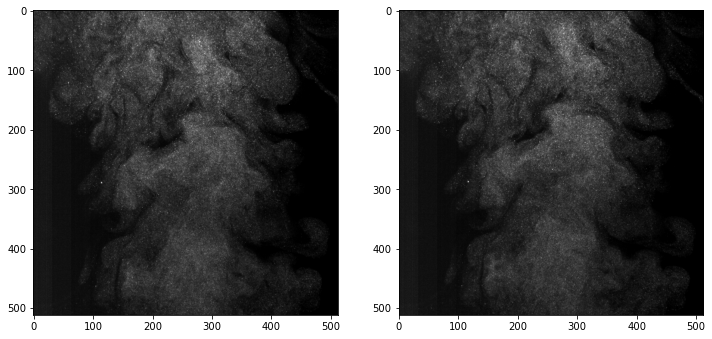

In [3]:
frame_a = tools.imread("./test_images/a_frame/c000a.bmp")
frame_b = tools.imread("./test_images/a_frame/c001a.bmp")

fig, ax = plt.subplots(1, 2, figsize = (12,10))

ax[0].imshow(frame_a, cmap = plt.cm.gray)
ax[1].imshow(frame_b, cmap = plt.cm.gray)


## Processing

In [4]:
winsize    = 32   # pixels, interrogation window size in frame A
searchsize = 38   # pixels, search area size in frame B
overlap    = 17   # pixels, 50% overlap
dt         = 0.02 # sec, time interval between the two frames

u0, v0, sig2noise = pyprocess.extended_search_area_piv(
    frame_a.astype(np.int32),
    frame_b.astype(np.int32),
    window_size=winsize,
    overlap=overlap,
    dt=dt,
    search_area_size=searchsize,
    sig2noise_method='peak2peak',
)

x, y = pyprocess.get_coordinates(
    image_size=frame_a.shape,
    search_area_size=searchsize,
    overlap=overlap,
)

## Post-processing

In [5]:
u1, v1, mask = validation.sig2noise_val(
    u0, v0,
    sig2noise,
    threshold = 1.05,
)

u2, v2 = filters.replace_outliers(
    u1, v1,
    method='localmean',
    max_iter=3,
    kernel_size=3,
)

# convert x,y to mm
# convert u,v to mm/sec

x, y, u3, v3 = scaling.uniform(
    x, y, u2, v2,
    scaling_factor = 96.52,  # 96.52 pixels/millimeter
)

# 0,0 shall be bottom left, positive rotation rate is counterclockwise
x, y, u3, v3 = tools.transform_coordinates(x, y, u3, v3)

## Results

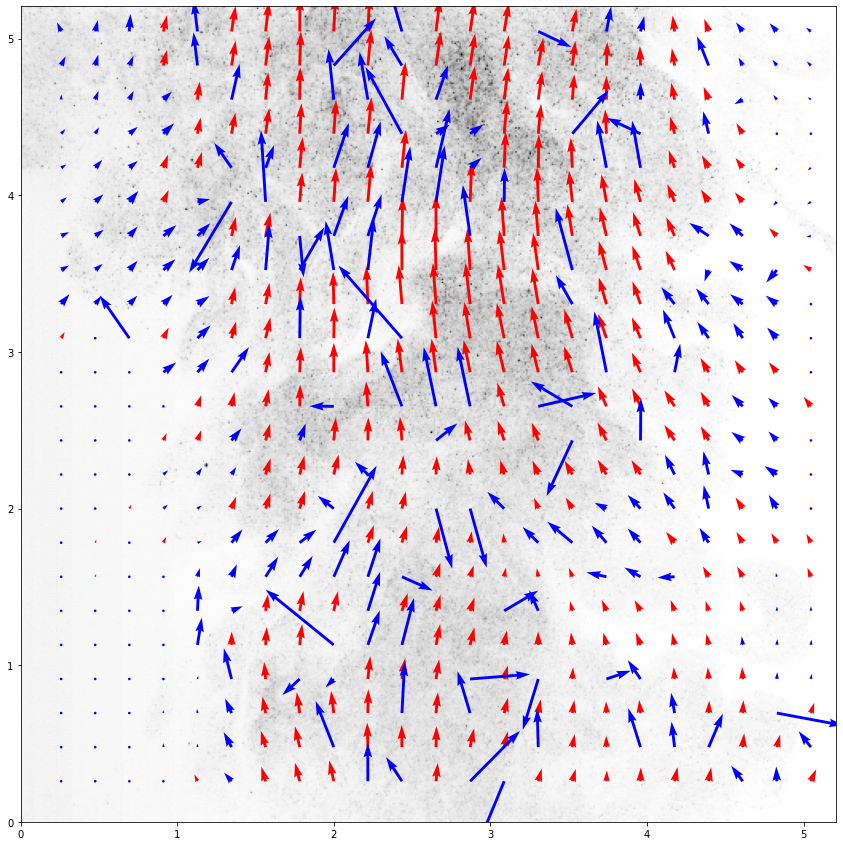

In [6]:
tools.save(x, y, u3, v3, mask, 'exp1_001.txt' )

fig, ax = plt.subplots(figsize=(15,15))

tools.display_vector_field(
    'exp1_001.txt',
    ax=ax,
    scaling_factor=100,
    scale=100, # scale defines here the arrow length
    width=0.0035, # width is the thickness of the arrow
    on_img=True, # overlay on the image
    image_name="./test_images/a_frame/c001a.bmp",
    
);
